In [130]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [131]:
#importing dataset
df = pd.read_csv('Churn_Modelling.csv')
X=df.iloc[:, 3:-1].values
y=df.iloc[:,-1].values

In [132]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [134]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [135]:
print(y)

[1 0 1 ... 1 1 0]


In [136]:
#LabelEncodeing gender 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X[:,2]=LE.fit_transform(X[:,2])

In [137]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [138]:
#OneHotEncoding geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
CT = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(CT.fit_transform(X))

In [139]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [140]:
#Spliting dataset into training set & testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [141]:
#Feature_Scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

In [142]:
print(X_train.shape)
print(X_test.shape)

(8000, 12)
(2000, 12)


In [143]:
#intializing ANN
model = Sequential()

In [144]:
#intializing input layer, hidden layer & output layer
model.add(Dense(units = 128, input_shape = (12,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [145]:
#summary 
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [146]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [147]:
#evaluating model on train set
history=model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4852 - accuracy: 0.7854
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8525
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8634
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8690
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8622
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8716
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8691
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8743
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8726
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8820

In [148]:
#evaluating model on test set
score=model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8490


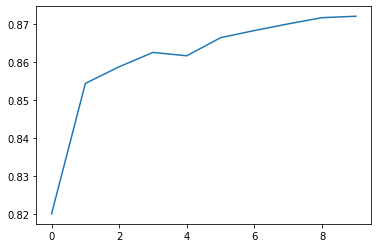

In [149]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.show()

In [150]:
#predicting test set results
y_pred=model.predict( X_test)
y_pred=y_pred>0.5
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [151]:
#confusion matrix
CM = confusion_matrix(y_test,y_pred)
print(CM)
accuracy_score(y_test,y_pred)

[[1472  123]
 [ 179  226]]


0.849